In [ ]:
# Instalar bibliotecas
!pip install pandas numpy==2.0 ydata-profiling ipywidgets seaborn matplotlib

# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Ignorar warnings..
import warnings 
warnings.filterwarnings("ignore")

# Configuração para gráficos no notebook
%matplotlib inline

# Ajuste do verbose no grid
param_grid = {
    'max_depth': np.arange(1, 11, 1),  # profundidade de 1 a 10
}
tree_model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)  

In [2]:
# Carregar os dados
df = pd.read_csv("/home/hub/Documents/inteligencia_artificial/clustering_classification/data/Iris.csv")

# Remover a coluna 'Id'
df = df.drop('Id', axis=1)

In [18]:
# Análise exploratória dos dados
print("Informações gerais:")
print(df.info())

print("\nValores únicos na coluna 'Species':")
print(df['Species'].unique())
print(df.shape)

Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Valores únicos na coluna 'Species':
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
(150, 5)


In [5]:
# Número de dados nulos total
df_null = df.isnull().sum()
df_null

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Figure size 1200x800 with 0 Axes>

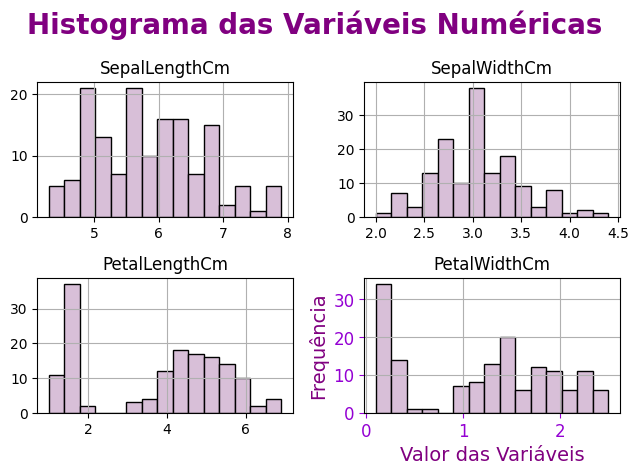

In [6]:
# Histogramas
plt.figure(figsize=(12, 8))
df.hist(bins=15, edgecolor='black', color="#D8BFD8")

# Mudando cor do título
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=18, fontweight='bold', color='darkviolet')

# Adicionando e ajustes
plt.suptitle('Histograma das Variáveis Numéricas', fontsize=20, fontweight='bold', color='purple')
plt.xlabel('Valor das Variáveis', fontsize=14, color='purple')
plt.ylabel('Frequência', fontsize=14, color='purple')

# Arrumando os eixos
plt.tick_params(axis='x', labelsize=12, colors='darkviolet')
plt.tick_params(axis='y', labelsize=12, colors='darkviolet')

# Ajustando o layout para um visual mais limpo
plt.tight_layout()
plt.show()

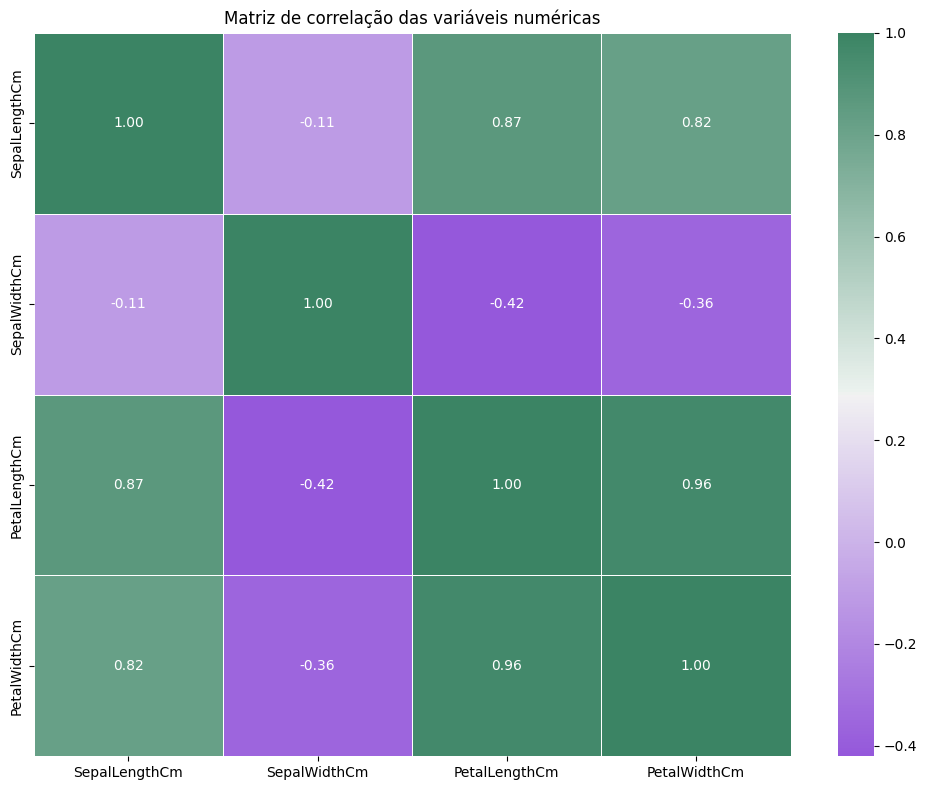

In [19]:
# Matriz de correlação
corr_matrix = df.drop(columns=['Species']).corr()
plt.figure(figsize=(10, 8))

# Criando paleta de roxo para verde
custom_cmap = sns.diverging_palette(280, 150, as_cmap=True)  # Roxo para verde

sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap=custom_cmap,
    fmt='.2f', 
    cbar=True, 
    linewidths=0.5
)

plt.title('Matriz de correlação das variáveis numéricas')
plt.tight_layout()
plt.show()

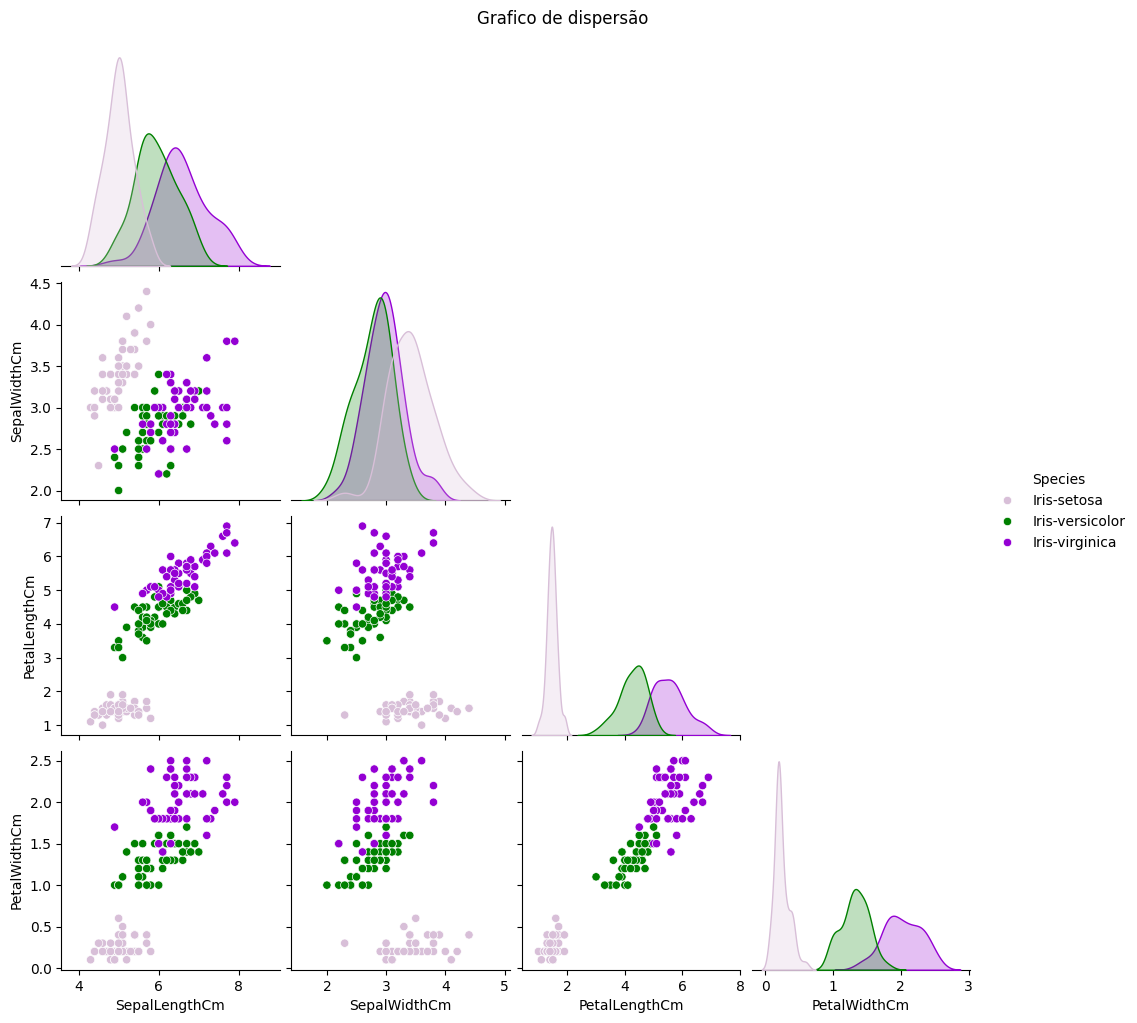

In [20]:
# Criando uma paleta
custom_palette = {"Iris-setosa": "#D8BFD8", "Iris-versicolor": "green", "Iris-virginica": "darkviolet"}

# Gráfico de dispersão atualizado
sns.pairplot(df, hue="Species", palette=custom_palette, diag_kind="kde", corner=True)

# Título do gráfico
plt.suptitle('Grafico de dispersão', y=1.02)
plt.show()


In [9]:
# Separando a variável Species e as variáveis explicativas
X = df.drop('Species', axis=1)
y = df['Species']

# Dividindo os dados em treino e teste 60% treino e 40% testeS
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Árvore de Decisão.

Acurácia no treino: 0.9916666666666667
Acurácia no teste: 0.9333333333333333

Relatório de Classificação no Teste:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30

Melhor Acurácia (validação cruzada): 0.9416666666666668
Melhores Parâmetros Encontrados: {'max_depth': np.int64(4)}


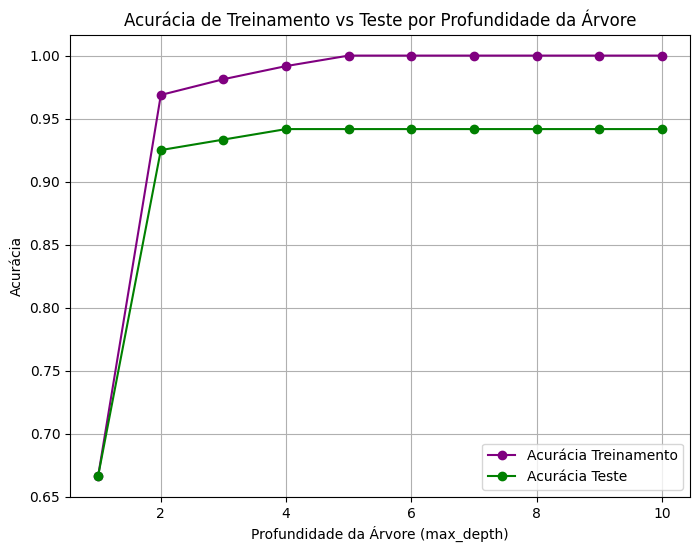

In [ ]:
# Parâmetros para ajuste de hiperparâmetros
param_grid = {
    'max_depth': np.arange(1, 11, 1),
}

# Árvore de Decisão, padrão (sem ajuste de hiperparâmetros)
print("Árvore de Decisão.")
model = DecisionTreeClassifier(random_state=42)

# Ajuste de hiperparâmetros com retorno das acurácias de treinamento
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)

# Treinando o modelo
grid_search.fit(X_train, y_train)

# Melhor modelo que encontreu
best_tree_model = grid_search.best_estimator_

# Previsões
y_pred_train = best_tree_model.predict(X_train)
y_pred_test = best_tree_model.predict(X_test)

# Avaliação do modelo
print(f"\nAcurácia no treino: {accuracy_score(y_train, y_pred_train)}")
print(f"Acurácia no teste: {accuracy_score(y_test, y_pred_test)}")

print("\nRelatório de Classificação no Teste:\n", classification_report(y_test, y_pred_test))

# Melhor desempenho e melhores parâmetros
print("Melhor Acurácia (validação cruzada):", grid_search.best_score_)
print("Melhores Parâmetros Encontrados:", grid_search.best_params_)

# Acurácias de treinamento e teste
train_accuracies = grid_search.cv_results_['mean_train_score']
test_accuracies = grid_search.cv_results_['mean_test_score']

# Plotando o gráfico de acurácias
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11, 1), train_accuracies, marker='o', linestyle='-', color='purple', label='Acurácia Treinamento')
plt.plot(np.arange(1, 11, 1), test_accuracies, marker='o', linestyle='-', color='green', label='Acurácia Teste')
plt.title("Acurácia de Treinamento vs Teste por Profundidade da Árvore")
plt.xlabel("Profundidade da Árvore (max_depth)")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()


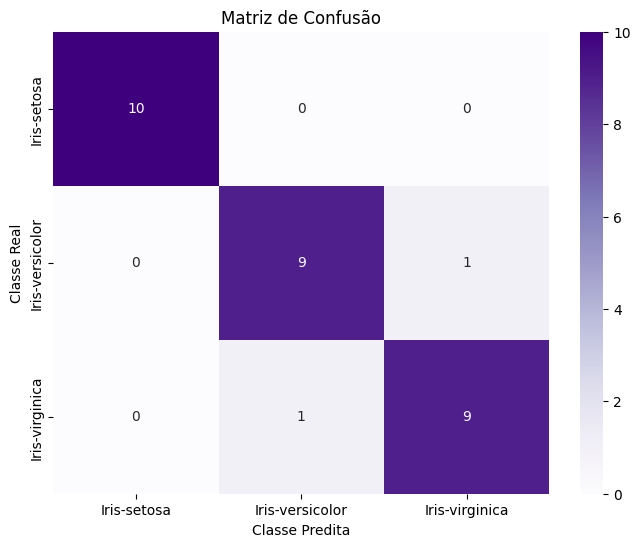

In [11]:
# Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=df['Species'].unique(), yticklabels=df['Species'].unique())
plt.title("Matriz de Confusão")
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()


Support Vector Machine (SVM).

Relatório de Classificação no Teste:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



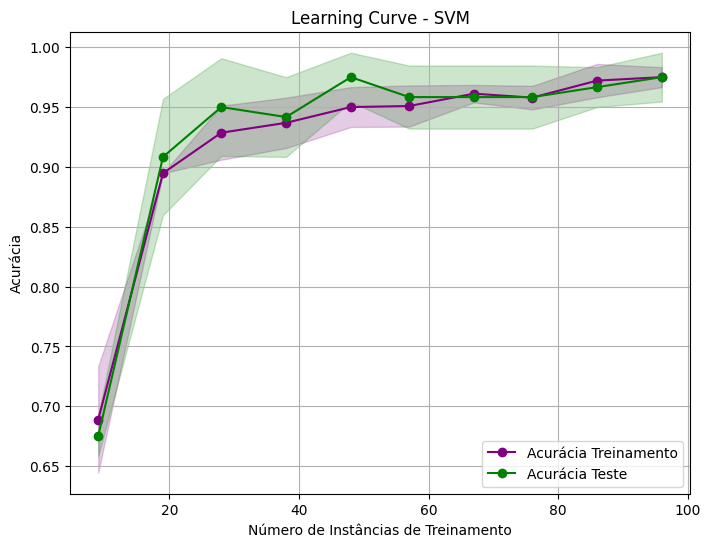

In [12]:
# SVM Algorithm
print("Support Vector Machine (SVM).")
svm_model = SVC(kernel='rbf', random_state=42)

# Calculando a curva
train_sizes, train_scores, test_scores = learning_curve(
    svm_model, X_train, y_train, cv=5, n_jobs=-1, scoring='accuracy', 
    train_sizes=np.linspace(0.1, 1.0, 10)  # De 10% até 100% das instâncias de treino
)

# Calculando a média e o desvio padrão das acurácias
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Exibindo o relatório após treinamento
svm_model.fit(X_train, y_train)
print("\nRelatório de Classificação no Teste:\n", classification_report(y_test, svm_model.predict(X_test)))

# Plotando a learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker='o', color='purple', label='Acurácia Treinamento')
plt.plot(train_sizes, test_mean, marker='o', color='green', label='Acurácia Teste')

# Somando o desvio padrão (área de erro em volta da curva do plot)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='purple', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.title("Learning Curve - SVM")
plt.xlabel("Número de Instâncias de Treinamento")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()

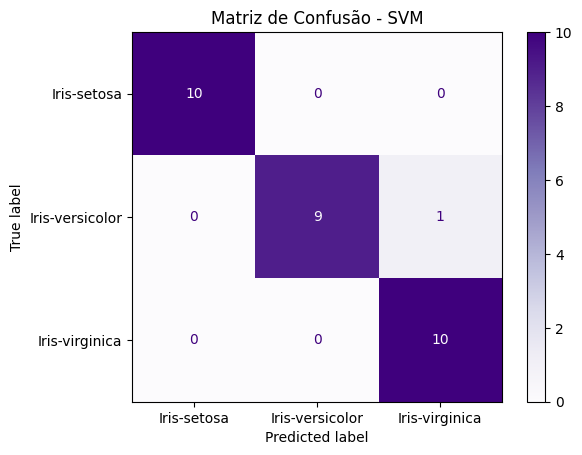

In [13]:
# Gerando previsões após treinamento
y_pred_svm = svm_model.predict(X_test)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Exibindo a matriz
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=svm_model.classes_)
disp.plot(cmap="Purples")
plt.title("Matriz de Confusão - SVM")
plt.show()



In [14]:
# novo modelo para analise K-Nearest Neighbour

In [15]:
# grafico do modelo 

In [16]:
# matriz de confusao do modelo

In [17]:
# comparacao entre os modelos